# Tutorial 3: Generating static survival-analysis data

__Survival analysis__ is a statistical method used to analyze data on the time it takes for an event of interest to occur. The event of interest is often called the "failure" or "censoring" event. Examples of failure events include death, disease onset, or equipment failure.

Static survival analysis refers to a specific type of survival analysis in which all subjects in the study are followed for the same length of time. In other words, the study is "static" because there is no ongoing enrollment of new subjects and no ongoing follow-up of existing subjects. This means that all subjects have the same "start" and "end" times for their follow-up.

In static survival analysis, the main goal is to estimate the probability of the failure event occurring at different time points.

`synthcity` includes models targeting specific tabular modalities. One of the specific modalities is for generating survival-analysis data. The general-purpose models can also be used for this task.

One significant difference compared to regular data is in the benchmarks. The downstream model performance is evaluated using the __C-Index__ and __Brier score__ metrics.

The main requirement of survival-analysis generators is to use a `SurvivalAnalysisDataLoader` dataloader.

In [1]:
!pip install synthcity
!pip uninstall -y torchaudio torchdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchtext to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is co

Found existing installation: torchaudio 2.5.1+cu124
Uninstalling torchaudio-2.5.1+cu124:
  Successfully uninstalled torchaudio-2.5.1+cu124


In [1]:
# stdlib
import sys
import warnings

# synthcity absolute
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import SurvivalAnalysisDataLoader

log.add(sink=sys.stderr, level="INFO")
warnings.filterwarnings("ignore")

In [2]:
# third party
from pycox import datasets

df = datasets.gbsg.read_df()
df = df[df["duration"] > 0]

df

Dataset 'gbsg' not locally available. Downloading...
Done


,x0,x1,x2,x3,x4,x5,x6,duration,event
0,0.0,0.0,0.0,32.0,1.0,155.0,168.0,84.000000,0
1,0.0,1.0,0.0,27.0,1.0,717.0,95.0,84.000000,0
2,0.0,1.0,1.0,52.0,1.0,120.0,437.0,84.000000,0
3,0.0,0.0,0.0,28.0,1.0,251.0,11.0,84.000000,0
4,0.0,0.0,0.0,39.0,1.0,241.0,92.0,66.234085,1
...,...,...,...,...,...,...,...,...,...
2227,0.0,1.0,0.0,49.0,3.0,1.0,84.0,23.687885,0
2228,1.0,1.0,1.0,53.0,17.0,0.0,0.0,6.110883,0
2229,0.0,1.0,0.0,51.0,5.0,43.0,0.0,25.264887,1
2230,0.0,1.0,1.0,52.0,3.0,15.0,34.0,23.885010,1


In [3]:
# Note: preprocessing data with OneHotEncoder or StandardScaler is not needed or recommended. Synthcity handles feature encoding and standardization internally.
loader = SurvivalAnalysisDataLoader(
    df,
    target_column="event",
    time_to_event_column="duration",
)

## List the available generative models

In [4]:
# synthcity absolute
from synthcity.plugins import Plugins

Plugins(categories=["generic", "survival_analysis"]).list()

[2025-03-09T20:53:28.774379+0000][19148][CRITICAL] module disabled: /usr/local/lib/python3.10/dist-packages/synthcity/plugins/generic/plugin_goggle.py
[2025-03-09T20:53:28.774379+0000][19148][CRITICAL] module disabled: /usr/local/lib/python3.10/dist-packages/synthcity/plugins/generic/plugin_goggle.py


['great',
 'survival_nflow',
 'survival_gan',
 'marginal_distributions',
 'arf',
 'nflow',
 'survival_ctgan',
 'ddpm',
 'bayesian_network',
 'dummy_sampler',
 'ctgan',
 'tvae',
 'survae',
 'rtvae',
 'uniform_sampler']

## Load and train a generative model

In [5]:
# synthcity absolute
from synthcity.plugins import Plugins

syn_model = Plugins().get("survival_gan")

syn_model.fit(loader)

[2025-03-09T20:53:29.433382+0000][19148][CRITICAL] module disabled: /usr/local/lib/python3.10/dist-packages/synthcity/plugins/generic/plugin_goggle.py
[2025-03-09T20:53:29.433382+0000][19148][CRITICAL] module disabled: /usr/local/lib/python3.10/dist-packages/synthcity/plugins/generic/plugin_goggle.py
[2025-03-09T20:53:29.958237+0000][19148][CRITICAL] load failed: cannot import name 'computed_field' from 'pydantic' (/usr/local/lib/python3.10/dist-packages/pydantic/__init__.cpython-310-x86_64-linux-gnu.so)
[2025-03-09T20:53:29.958237+0000][19148][CRITICAL] load failed: cannot import name 'computed_field' from 'pydantic' (/usr/local/lib/python3.10/dist-packages/pydantic/__init__.cpython-310-x86_64-linux-gnu.so)
[2025-03-09T20:53:29.962144+0000][19148][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2025-03-09T20:53:29.962144+0000][19148][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2025-

## Generate new data using the model

In [6]:
syn_model.generate(count=10).dataframe()

,x0,x1,x2,x3,x4,x5,x6,duration,event
0,0.0,1.0,0.0,33.607048,1.500735,6.076503,48.744640,60.692101,0
1,0.0,0.0,0.0,44.627125,1.368402,68.082588,343.921875,80.106812,0
2,0.0,0.0,1.0,59.693890,1.351487,23.800428,766.098938,85.371552,0
3,0.0,1.0,0.0,42.278755,15.323344,84.487114,30.076582,39.007298,0
4,1.0,1.0,1.0,63.290539,3.771718,561.279724,697.282837,15.399136,1
5,0.0,1.0,1.0,58.857491,1.000000,582.176941,120.560669,73.208366,0
6,0.0,1.0,0.0,32.935215,6.253178,151.276367,325.357788,77.930122,0
7,0.0,1.0,1.0,71.015518,7.152485,299.980988,308.924164,17.428118,1
8,0.0,0.0,0.0,48.054890,12.171099,302.517395,91.771233,47.426220,0
9,0.0,0.0,0.0,49.151176,1.335741,167.887497,28.525715,36.572990,0


## Generate new data using a conditional

We will use the `event` outcome to condition the data generation.

In [7]:
# synthcity absolute
from synthcity.plugins import Plugins

syn_model = Plugins().get("survival_gan")

cond = df["event"]

syn_model.fit(loader, cond=cond)

[2025-03-09T20:56:26.195477+0000][19148][CRITICAL] module disabled: /usr/local/lib/python3.10/dist-packages/synthcity/plugins/generic/plugin_goggle.py
[2025-03-09T20:56:26.198514+0000][19148][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2025-03-09T20:56:26.200031+0000][19148][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2025-03-09T20:56:26.201373+0000][19148][CRITICAL] module plugin_decaf load failed
[2025-03-09T20:56:26.667413+0000][19148][CRITICAL] module disabled: /usr/local/lib/python3.10/dist-packages/synthcity/plugins/generic/plugin_goggle.py
[2025-03-09T20:56:26.671376+0000][19148][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2025-03-09T20:56:26.673752+0000][19148][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2025-03-09T20:56:26.676127+0000][19148][CRITICAL] module plugi

In [8]:
import numpy as np

count = 10
syn_model.generate(count=count, cond=np.ones(count)).dataframe()

,x0,x1,x2,x3,x4,x5,x6,duration,event
0,0.0,1.0,1.0,79.331551,1.259392,0.000000,23.903473,4.150545,1
1,0.0,0.0,1.0,43.449238,4.195507,0.000000,10.706779,12.862272,1
2,1.0,0.0,1.0,81.856499,7.695390,42.381889,314.219147,30.297499,1
3,0.0,0.0,0.0,47.232346,4.194153,0.000000,0.000000,12.003703,1
4,0.0,0.0,1.0,84.881180,1.242489,0.000000,578.598694,45.988056,1
5,0.0,0.0,0.0,52.461506,1.438777,39.137424,101.853119,44.539650,1
6,0.0,2.0,1.0,75.594658,15.870388,1188.658813,293.151031,38.444458,1
7,1.0,1.0,1.0,61.885105,6.168647,0.000000,1.015785,16.911118,1
8,0.0,1.0,1.0,62.891121,3.426644,4.591259,454.801422,31.513180,1
9,1.0,0.0,1.0,67.970207,5.907015,50.446686,221.341217,31.158213,1


## Serialization

In [9]:
# synthcity absolute
from synthcity.utils.serialization import load, load_from_file, save, save_to_file

buff = save(syn_model)

type(buff)

bytes

In [10]:
reloaded = load(buff)

reloaded.name()

'survival_gan'

## Plot real-synthetic distributions

Compared to the general case, the survival-analysis data includes KM plots for real and synthetic data.

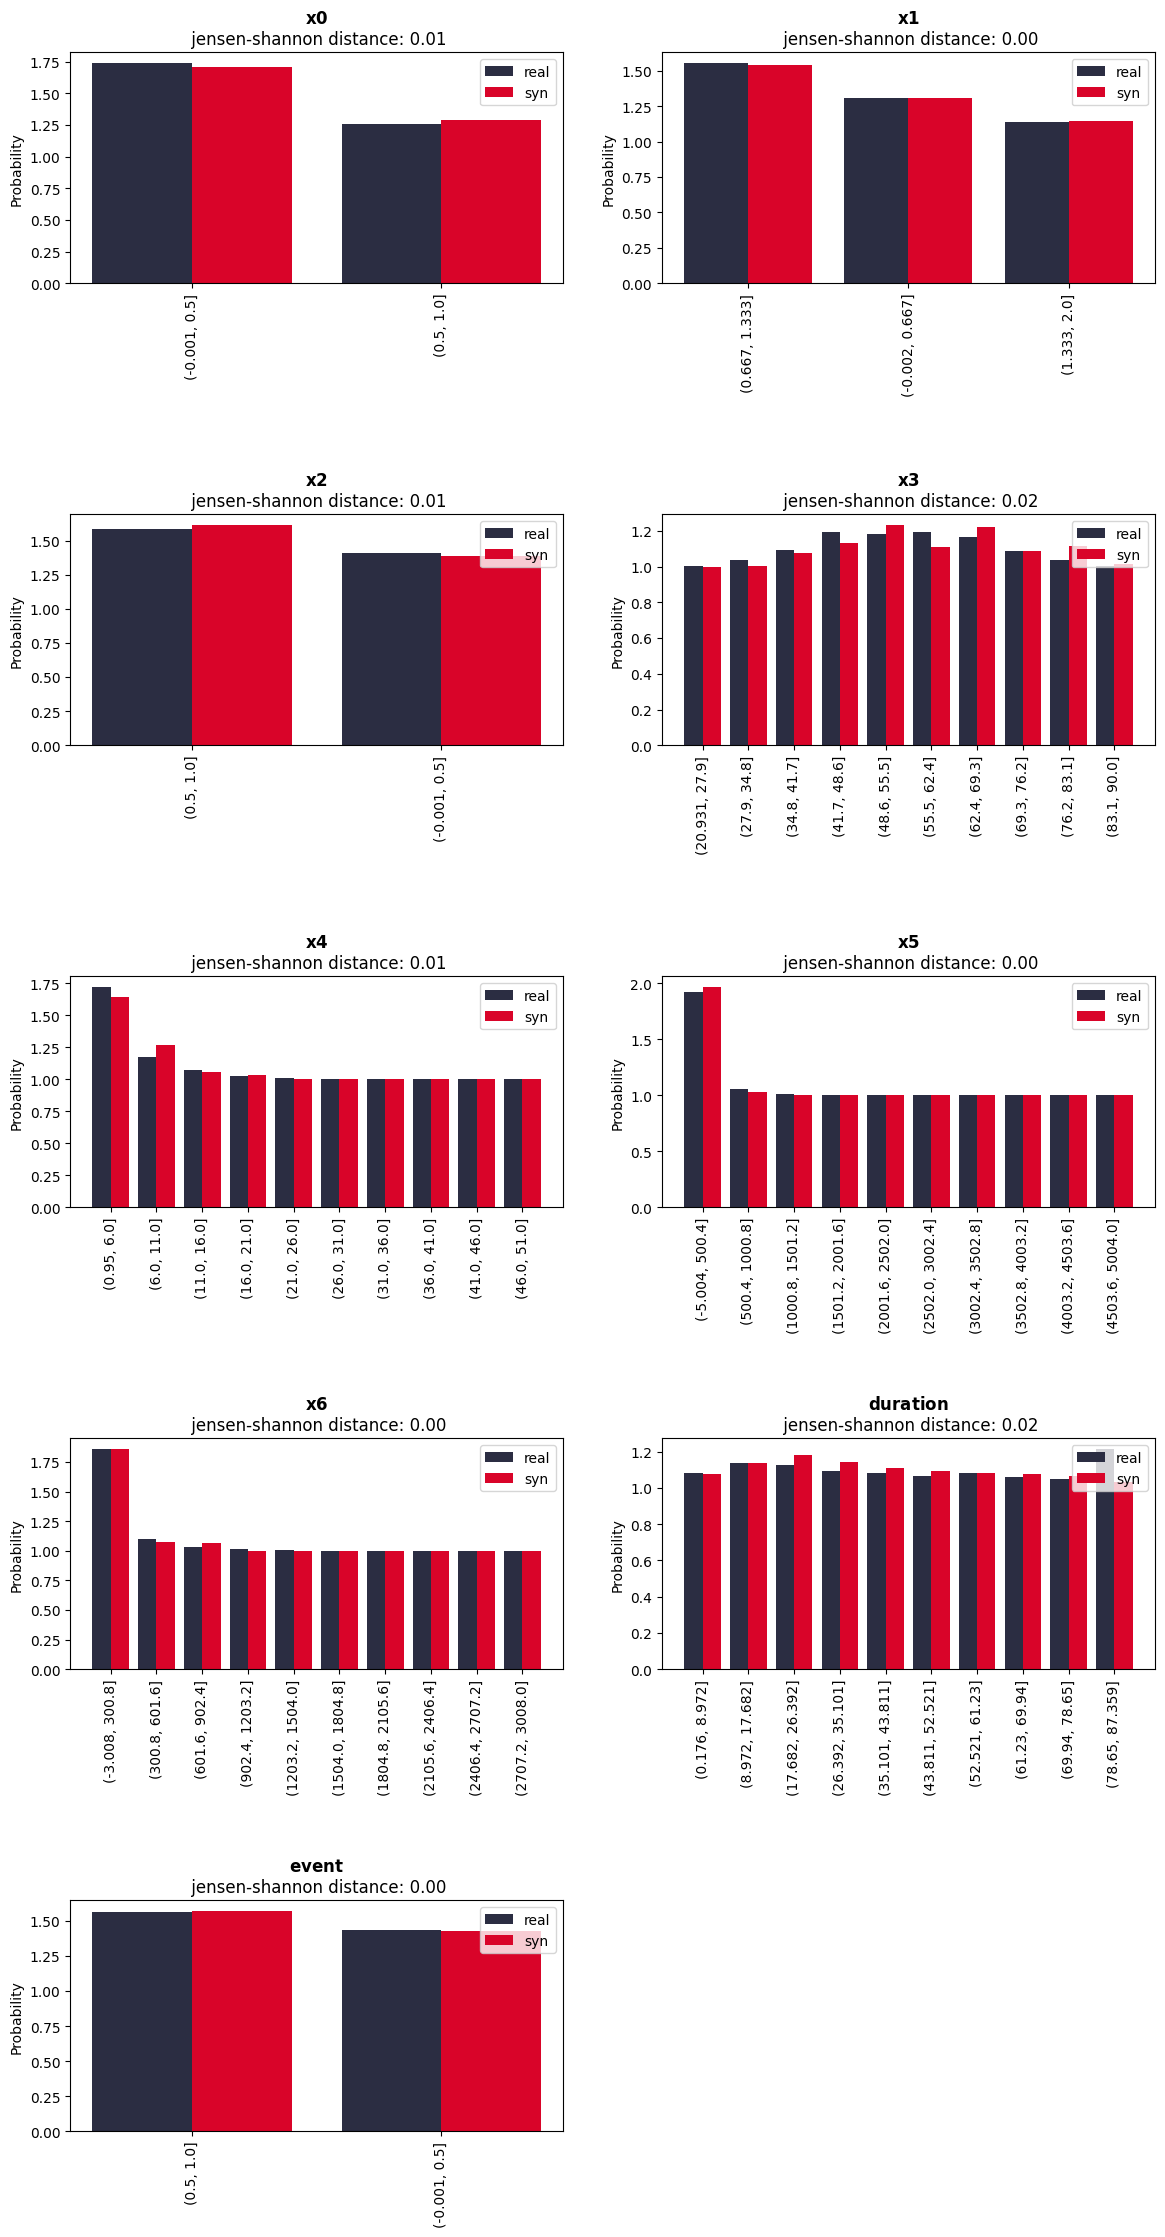

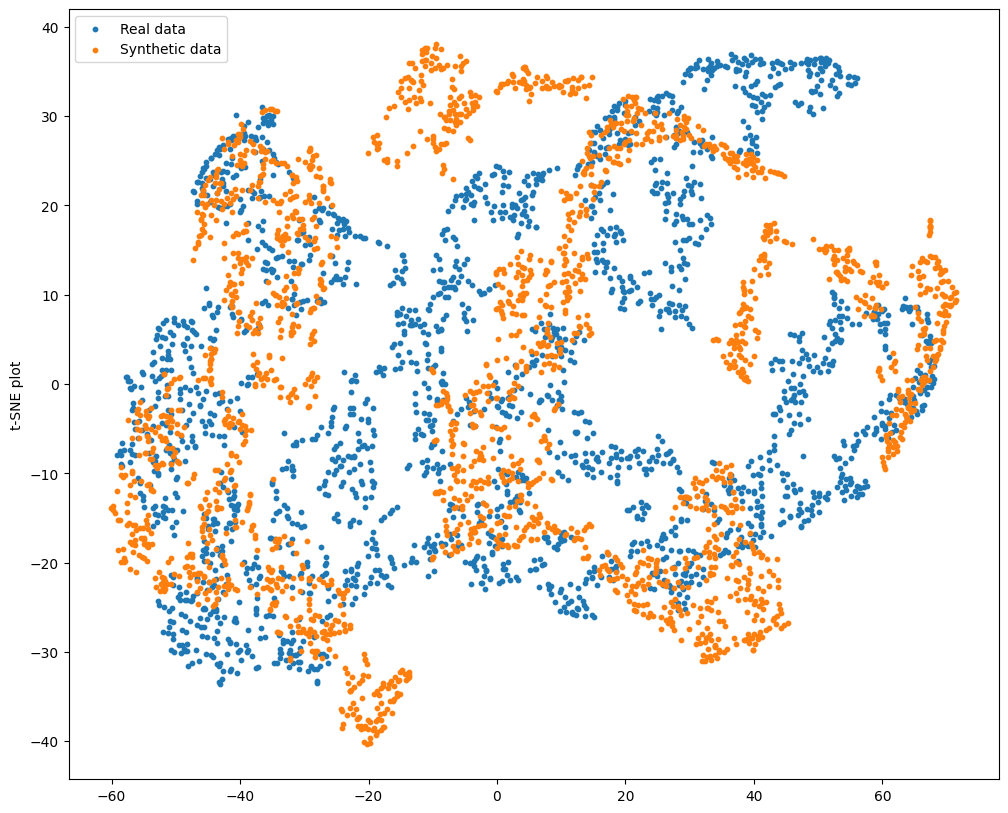

In [11]:
# third party
import matplotlib.pyplot as plt

syn_model.plot(plt, loader)

plt.show()

## Benchmarking metrics

| **Metric**                                         | **Description**                                                                                                            |
|----------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------|
| sanity.data\_mismatch.score                        | Data types mismatch between the real//synthetic features                                                                   |
| sanity.common\_rows\_proportion.score              | Real data copy-paste in the synthetic data                                                                                 |
| sanity.nearest\_syn\_neighbor\_distance.mean       | Computes the \textless{}reduction\textgreater{}(distance) from the real data to the closest neighbor in the synthetic data |
| sanity.close\_values\_probability.score            | the probability of close values between the real and synthetic data.                                                       |
| sanity.distant\_values\_probability.score          | the probability of distant values between the real and synthetic data.                                                     |
| stats.jensenshannon\_dist.marginal                 | the average Jensen-Shannon distance                                                                                        |
| stats.chi\_squared\_test.marginal                  | the one-way chi-square test.                                                                                               |
| stats.feature\_corr.joint                          | the correlation/strength-of-association of features in data-set with both categorical and continuous features              |
| stats.inv\_kl\_divergence.marginal                 | the average inverse of the Kullback–Leibler Divergence metric.                                                             |
| stats.ks\_test.marginal                            | the Kolmogorov-Smirnov test for goodness of fit.                                                                           |
| stats.max\_mean\_discrepancy.joint                 | Empirical maximum mean discrepancy. The lower the result the more evidence that distributions are the same.                |
| stats.prdc.precision                               | precision between the two manifolds                                                                                        |
| stats.prdc.recall                                  | recall between the two manifolds                                                                                           |
| stats.prdc.density                                 | density between the two manifolds                                                                                          |
| stats.prdc.coverage                                | coverage between the two manifolds                                                                                         |
| stats.alpha\_precision.delta\_precision\_alpha\_OC | Delta precision                                                                                                            |
| stats.alpha\_precision.delta\_coverage\_beta\_OC   | Delta coverage                                                                                                             |
| stats.alpha\_precision.authenticity\_OC            | Authetnticity                                                                                                              |
| stats.survival\_km\_distance.optimism              | Kaplan-Meier distance between real-synthetic data                                                                          |
| stats.survival\_km\_distance.abs\_optimism         | Kaplan-Meier metrics absolute distance between real-syn data                                                               |
| stats.survival\_km\_distance.sightedness           | Kaplan-Meier metrics distance on the temporal axis                                                                         |
| performance.linear\_model.gt.c\_index              | Train on real, test on the test real data using CoxPH: C-Index                                                             |
| performance.linear\_model.gt.brier\_score          | Train on real, test on the test real data using CoxPH: Brier score                                                         |
| performance.linear\_model.syn\_id.c\_index         | Train on synthetic, test on the train real data using CoxPH: C-Index                                                       |
| performance.linear\_model.syn\_id.brier\_score     | Train on synthetic, test on the train real data using CoxPH: Brier score                                                   |
| performance.linear\_model.syn\_ood.c\_index        | Train on synthetic, test on the test real data using CoxPH: C-Index                                                        |
| performance.linear\_model.syn\_ood.brier\_score    | Train on synthetic, test on the test real data using CoxPH: Brier score                                                    |
| performance.mlp.gt.c\_index                        | Train on real, test on the test real data using NN: C-Index                                                                |
| performance.mlp.gt.brier\_score                    | Train on real, test on the test real data using NN : Brier score                                                           |
| performance.mlp.syn\_id.c\_index                   | Train on synthetic, test on the train real data using NN: C-Index                                                          |
| performance.mlp.syn\_id.brier\_score               | Train on synthetic, test on the train real data using NN: Brier score                                                      |
| performance.mlp.syn\_ood.c\_index                  | Train on synthetic, test on the test real data using NN: C-Index                                                           |
| performance.mlp.syn\_ood.brier\_score              | Train on synthetic, test on the test real data using NN: Brier score                                                       |
| performance.xgb.gt.c\_index                        | Train on real, test on the test real data using XGB: C-Index                                                               |
| performance.xgb.gt.brier\_score                    | Train on real, test on the test real data using XGB : Brier score                                                          |
| performance.xgb.syn\_id.c\_index                   | Train on synthetic, test on the train real data using XGB: C-Index                                                         |
| performance.xgb.syn\_id.brier\_score               | Train on synthetic, test on the train real data using XGB: Brier score                                                     |
| performance.xgb.syn\_ood.c\_index                  | Train on synthetic, test on the test real data using XGB: C-Index                                                          |
| performance.xgb.syn\_ood.brier\_score              | Train on synthetic, test on the test real data using XGB: Brier score                                                      |
| performance.feat\_rank\_distance.corr              | Correlation for the rank distances between the feature importance on real and synthetic data                               |
| performance.feat\_rank\_distance.pvalue            | p-vale for the rank distances between the feature importance on real and synthetic data                                    |
| detection.detection\_xgb.mean                      | The average AUCROC score for detecting synthetic data using an XGBoost.                                                    |
| detection.detection\_mlp.mean                      | The average AUCROC score for detecting synthetic data using a NN.                                                          |
| detection.detection\_gmm.mean                      | The average AUCROC score for detecting synthetic data using a GMM.                                                         |
| privacy.delta-presence.score                       | the maximum re-identification probability on the real dataset from the synthetic dataset.                                  |
| privacy.k-anonymization.gt                         | the k-anon for the real data                                                                                               |
| privacy.k-anonymization.syn                        | the k-anon for the synthetic data                                                                                          |
| privacy.k-map.score                                | the minimum value k that satisfies the k-map rule.                                                                         |
| privacy.distinct l-diversity.gt                    | the l-diversity for the real data                                                                                          |
| privacy.distinct l-diversity.syn                   | the l-diversity for the synthetic data                                                                                     |
| privacy.identifiability\_score.score               | the re-identification score on the real dataset from the synthetic dataset.                                                |

## Benchmark the quality of plugins

For survival analysis, general purpose generators can be used as well.

In [12]:
# synthcity absolute
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [(f"test_{model}", model, {}) for model in ["adsgan", "survival_gan", "survae"]],
    loader,
    synthetic_size=1000,
    repeats=2,
    task_type="survival_analysis",
)

[2025-03-09T20:59:00.910894+0000][19148][CRITICAL] module disabled: /usr/local/lib/python3.10/dist-packages/synthcity/plugins/generic/plugin_goggle.py
[2025-03-09T20:59:00.913156+0000][19148][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2025-03-09T20:59:00.914204+0000][19148][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2025-03-09T20:59:00.915424+0000][19148][CRITICAL] module plugin_decaf load failed
  3%|▎         | 299/10000 [01:11<38:30,  4.20it/s]
[2025-03-09T21:01:42.546943+0000][19148][CRITICAL] module disabled: /usr/local/lib/python3.10/dist-packages/synthcity/plugins/generic/plugin_goggle.py
[2025-03-09T21:01:42.549125+0000][19148][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2025-03-09T21:01:42.550070+0000][19148][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2025-03-09

In [13]:
Benchmarks.print(score)


Comparatives


,test_adsgan,test_survival_gan,test_survae
sanity.data_mismatch.score,0.6 +/- 0.0,0.6 +/- 0.0,0.6 +/- 0.0
sanity.common_rows_proportion.score,0.0 +/- 0.0,0.0 +/- 0.0,0.0 +/- 0.0
sanity.nearest_syn_neighbor_distance.mean,0.023 +/- 0.001,0.024 +/- 0.002,0.021 +/- 0.003
sanity.close_values_probability.score,0.991 +/- 0.0,0.987 +/- 0.0,0.992 +/- 0.001
sanity.distant_values_probability.score,0.002 +/- 0.0,0.003 +/- 0.001,0.002 +/- 0.0
stats.jensenshannon_dist.marginal,0.014 +/- 0.001,0.022 +/- 0.011,0.013 +/- 0.001
stats.chi_squared_test.marginal,0.515 +/- 0.002,0.548 +/- 0.098,0.522 +/- 0.005
stats.inv_kl_divergence.marginal,0.839 +/- 0.001,0.807 +/- 0.076,0.871 +/- 0.01
stats.ks_test.marginal,0.846 +/- 0.011,0.791 +/- 0.069,0.875 +/- 0.001
stats.max_mean_discrepancy.joint,0.004 +/- 0.001,0.005 +/- 0.001,0.004 +/- 0.001


## Congratulations!

Congratulations on completing this notebook tutorial! If you enjoyed this and would like to join the movement towards Machine learning and AI for medicine, you can do so in the following ways!

### Star [Synthcity](https://github.com/vanderschaarlab/synthcity) on GitHub

- The easiest way to help our community is just by starring the Repos! This helps raise awareness of the tools we're building.


### Checkout other projects from vanderschaarlab
- [HyperImpute](https://github.com/vanderschaarlab/hyperimpute)
- [AutoPrognosis](https://github.com/vanderschaarlab/autoprognosis)
